This is a TensorFlow implementation of the Collaborative Filtering recommender system

In [59]:
import scipy.io
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [129]:
mat = scipy.io.loadmat('movies_data.mat')

In [154]:
R = mat['R']
Y = mat['Y']

In [68]:
titles = open('movie_ids.txt','r')
titles = titles.readlines()

In [71]:
titles

['1 Toy Story (1995)\n',
 '2 GoldenEye (1995)\n',
 '3 Four Rooms (1995)\n',
 '4 Get Shorty (1995)\n',
 '5 Copycat (1995)\n',
 '6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)\n',
 '7 Twelve Monkeys (1995)\n',
 '8 Babe (1995)\n',
 '9 Dead Man Walking (1995)\n',
 '10 Richard III (1995)\n',
 '11 Seven (Se7en) (1995)\n',
 '12 Usual Suspects, The (1995)\n',
 '13 Mighty Aphrodite (1995)\n',
 '14 Postino, Il (1994)\n',
 "15 Mr. Holland's Opus (1995)\n",
 '16 French Twist (Gazon maudit) (1995)\n',
 '17 From Dusk Till Dawn (1996)\n',
 '18 White Balloon, The (1995)\n',
 "19 Antonia's Line (1995)\n",
 '20 Angels and Insects (1995)\n',
 '21 Muppet Treasure Island (1996)\n',
 '22 Braveheart (1995)\n',
 '23 Taxi Driver (1976)\n',
 '24 Rumble in the Bronx (1995)\n',
 '25 Birdcage, The (1996)\n',
 '26 Brothers McMullen, The (1995)\n',
 '27 Bad Boys (1995)\n',
 '28 Apollo 13 (1995)\n',
 '29 Batman Forever (1995)\n',
 '30 Belle de jour (1967)\n',
 '31 Crimson Tide (1995)\n',
 '32 Crumb (1994)\n',

In [162]:
print 'Number of movies = ',len(titles),'= Y.shape[0], and the number of users is', Y.shape[1]

Number of movies =  1682 = Y.shape[0], and the number of users is 943


In [163]:
def create_placeholders(num_m, num_u):
    Y = tf.placeholder(tf.float32, shape = [num_m, num_u], name='Y')
    R = tf.placeholder(tf.float32, shape = [num_m, num_u], name='R')
    return Y, R

In [164]:
def initialize_parameters(num_m, num_u, n=100, seed=1):
    '''
    Initialize the wegights X and Theta
    '''
    X = tf.get_variable('X', [num_m, n], initializer=tf.contrib.layers.xavier_initializer(seed=seed))
    Theta = tf.get_variable('Theta', [num_u, n], initializer=tf.contrib.layers.xavier_initializer(seed=seed))
    
    parameters = {"X": X,
                  "Theta": Theta}
    
    return parameters

In [165]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters(20, 10)
    print(parameters['X'])
    print(parameters['Theta'])

Tensor("X/read:0", shape=(20, 100), dtype=float32)
Tensor("Theta/read:0", shape=(10, 100), dtype=float32)


In [166]:
def compute_cost(parameters, Y, R):
    '''
    parameters - contains X (weights of the items) and Theta (weights of the users)
    Y - tensor of shape (num_m, num_u) with all ratings
    R - the binary version of Y
    
    result is the L_2 norm of the difference betwen X.Theta^T and Y for nonzero entries of R
    '''
    X = parameters['X']
    Theta = parameters['Theta']
    result = tf.matmul(X,tf.transpose(Theta))
    result = tf.multiply(result,R)
    result = tf.subtract(result, Y)
    result = tf.square(result)
    result = tf.reduce_sum(result)
    return result/2.    

In [167]:
tf.reset_default_graph()

with tf.Session() as sess:
    Y_, R_ = create_placeholders(20, 5)
    parameters = initialize_parameters(20, 5)
    c = cost(parameters, Y_, R_)
    print("cost = " + str(c))

cost = Tensor("div:0", shape=(), dtype=float32)


In [168]:
def model(Y_train, R_train, num_epochs=100, print_int=20, learning_rate=0.009, print_cost=True):
    
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (num_m, num_u) = Y_train.shape 
    Y, R = create_placeholders(num_m, num_u)
    parameters = initialize_parameters(num_m, num_u)
    costs = []
    cost = compute_cost(parameters, Y, R)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(0,num_epochs):
            seed += 1
            _, epoch_cost = sess.run([optimizer, cost], feed_dict={Y:Y_train, R:R_train})
            
            if print_cost == True and epoch % print_int == 0:
                print("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        
        return parameters, costs

Cost after epoch 0: 686289.812500
Cost after epoch 100: 27740.134766
Cost after epoch 200: 15410.502930
Cost after epoch 300: 7396.582031
Cost after epoch 400: 3535.217285
Cost after epoch 500: 1870.124878
Cost after epoch 600: 1106.860718
Cost after epoch 700: 711.277649
Cost after epoch 800: 483.363190
Cost after epoch 900: 341.865112


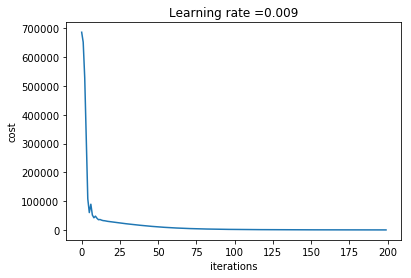

Parameters have been trained!


In [169]:
p = model(Y,R, num_epochs=1000,print_int=100)

In [170]:
p

({'Theta': array([[-0.19979064, -0.05768216, -0.38303015, ...,  0.04951204,
          -0.25852782,  0.15072282],
         [ 0.05189276,  0.35471702, -1.18758011, ..., -0.69314027,
           0.23647109, -0.37432396],
         [-0.09587413,  0.18769428, -0.25862598, ...,  0.26838458,
           0.57690519, -0.58793575],
         ..., 
         [ 0.27160197,  0.06194284, -0.7490648 , ..., -0.27875859,
           0.323129  , -0.17923051],
         [ 0.38678959,  0.37029654, -0.68152851, ..., -0.19695349,
           0.08088954, -0.25147533],
         [ 0.46669757, -0.65227193, -0.35872999, ..., -0.35100695,
           0.31729594, -0.53245449]], dtype=float32),
  'X': array([[ 0.10871115, -0.43386483,  0.04402864, ..., -0.301177  ,
           0.25020111,  0.31335241],
         [ 0.29296264,  0.28489649,  0.49373746, ..., -0.05201529,
           0.46707335, -0.19938172],
         [ 0.4068315 ,  0.13310722, -0.33651489, ..., -0.30176678,
           0.09117887, -0.71186316],
         ..., 
   